<a href="https://colab.research.google.com/github/Etinuz/Courses-DL1/blob/master/lesson_4_tabular_Kaggle_Titanic_Survivors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 4 tabular - Titanic
The notebook is about predicting the Titanic Survivors with a neural network based on Jeremy's lesson 4 about tabular data. With this notebook you can also submit to Kaggle to join your first competition. 

Disclaimer: A neural network won't give you the best results on this dataset. People who are using random forest/XGBoost get much better results. 

In [381]:
from fastai.tabular import *

import fastai   

fastai.__version__

'1.0.46'

In [0]:
np.random.seed(42)

In [383]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
#first download API token from Kaggle -> Account
#upload kaggle.json into content
!cp /content/kaggle.json /root/.kaggle/kaggle.json 


In [385]:
!kaggle competitions download -c titanic
!ls

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
 download-all		 models		  test.csv	      train.csv
 download-all.1		 sample_data	 'titanic.zip?dl=0'
 gender_submission.csv	'spam.zip?dl=0'   tmp_clas
 kaggle.json		 submission.csv   tmp_lm


Tabular data should be in a Pandas `DataFrame`.

In [0]:
path = Path('/content')
train_df = pd.read_csv(path/'train.csv', encoding='latin-1')
test_df = pd.read_csv(path/'test.csv', encoding='latin-1')

In [387]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [388]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [389]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [390]:
test_df.describe() #check if the test data looks similar to the train data

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)



parch: The dataset defines family relations in this way...

Parent = mother, father
Child = daughter, son, stepdaughter, stepson



https://www.kaggle.com/c/titanic-gettingStarted/data 

In [391]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Feature engineering (optional)

Some feature engineering from other Kagglers


In [0]:
def class_age(age):
    if age <= 15: return 'child'  # was 10
    #elif age <= 21: return 'adult'
    elif age <= 60: return 'young'
    else: return 'old'
    


In [0]:
# dealing with nulls 
# 1 Fare in test_df (all_df[all_df['Fare'].isnull()]), use media = 14.55 from all_df.describe()
mask = test_df['Fare'].isnull()
test_df.loc[mask, 'Fare'] = 14.55
# 2 embarked in train_df (all_df[all_df['Embarked'].isnull()]) survived is not null, so train 
mask2 = train_df['Embarked'].isnull()
train_df.loc[mask2, 'Embarked'] = 'S'
# 263 ages, use median per sex: all_df.groupby('Sex').median()['Age'] => F 27, M: 28 
mask3 = (train_df['Age'].isnull()) & (train_df['Sex'] == 'female')
train_df.loc[mask3, 'Age'] = 27.0
mask4 = (train_df['Age'].isnull()) & (train_df['Sex'] == 'male')
train_df.loc[mask4, 'Age'] = 28.0
mask5 = (test_df['Age'].isnull()) & (test_df['Sex'] == 'female')
test_df.loc[mask5, 'Age'] = 27.0
mask6 = (test_df['Age'].isnull()) & (test_df['Sex'] == 'male')
test_df.loc[mask6, 'Age'] = 28.0

In [394]:
for df in [train_df, test_df]:
    df['AgeGroup'] = df['Age'].apply(lambda x: class_age(x))   
    df['FamilySize'] = df['SibSp'] + df['Parch'] +1 
    df['IsAlone'] = 1
    df['IsAlone'].loc[df['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1
    df['SibCh'] = df['SibSp'] * df['Parch'] > 0
    df['FareBin'] = pd.qcut(df['Fare'], 4)
   
    


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [0]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [0]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

# Databunch

In [398]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
AgeGroup       891 non-null object
FamilySize     891 non-null int64
IsAlone        891 non-null int64
SibCh          891 non-null bool
FareBin        891 non-null category
Deck           891 non-null int64
Title          891 non-null int64
dtypes: bool(1), category(1), float64(2), int64(10), object(3)
memory usage: 106.3+ KB


In [0]:
#you need to fill the missing value in Fare in the test dataframe
test_df['Fare'].fillna(train_df['Fare'].median(), inplace = True)

In [0]:
#Option 1) without feature engineering
dep_var = 'Survived' 
cat_names = ['Pclass', 'Sex', 'Embarked', 'Cabin']
cont_names = ['Age', 'Fare', 'Parch', 'SibSp' ]

#didnt use: PassengerId, Name , Ticket                  



In [0]:
#Option 2) only cabin to deck feature engineering
dep_var = 'Survived' 
cat_names = ['Pclass', 'Sex', 'Embarked', 'Deck']
cont_names = ['Age', 'Fare', 'Parch', 'SibSp' ]

#didnt use: PassengerId, Name , Ticket                  


In [0]:
#Option 3) with all feature engineering
dep_var = 'Survived' 
cat_names = ['Pclass', 'Sex','SibSp', 'Parch', 'Embarked', 'AgeGroup', 'FareBin', 'IsAlone','SibCh', 'FamilySize', 'Deck','Title'] # 
cont_names = ['Age', 'Fare' ] # 'Parch', 'SibSp'



In [0]:

procs = [FillMissing, Categorify, Normalize] #default feature enginering from FastAI

In [0]:
#define the test set
test = TabularList.from_df(test_df, cat_names=cat_names, cont_names=cont_names, procs=procs)

In [0]:
data = (TabularList.from_df(train_df, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
                           #.split_by_idx(list(range(0,150)))#define your validation set
                           .random_split_by_pct(0.1)
                           .label_from_df(cols=dep_var) #dependent variable
                           .add_test(test, label=0) #add the test set tot the databunch
                           .databunch())

In [464]:
data.show_batch(rows=10)
#the values are normalized, there is one extra column
#target is dependent variabele
#embeddings are created for the categorical variables

Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,FareBin,IsAlone,SibCh,FamilySize,Deck,Title,Age,Fare,target
1,0,0,0,S,young,"(-0.001, 7.91]",1,False,1,1,1,0.7461,-0.6352,0
3,1,0,0,S,young,"(-0.001, 7.91]",1,False,1,8,2,-0.8738,-0.4806,0
1,1,0,1,S,young,"(31.0, 512.329]",0,False,2,5,2,-0.5652,0.4580,1
3,1,0,2,Q,young,"(-0.001, 7.91]",0,False,3,8,2,-0.1795,-0.4811,0
3,0,0,0,S,young,"(14.454, 31.0]",1,False,1,8,1,-0.1024,-0.3350,0
1,0,0,0,C,young,"(31.0, 512.329]",1,False,1,2,1,0.4376,9.5479,1
3,0,0,0,S,young,"(31.0, 512.329]",1,False,1,8,1,-0.1024,0.4877,0
3,0,1,0,S,young,"(14.454, 31.0]",0,False,2,8,1,-0.1024,-0.3201,0
1,1,1,0,C,young,"(31.0, 512.329]",0,False,2,8,3,-0.1795,0.9981,1
3,1,0,0,S,old,"(7.91, 14.454]",1,False,1,8,3,2.5975,-0.4446,1


In [465]:
len(data.train_ds), len(data.valid_ds), len(data.test_ds)
#we only train on 741 items

(802, 89, 418)

# Training

In [0]:
#built your learner, choose the output size of the layers
learn = tabular_learner(data, layers=[200,100], metrics=[accuracy, error_rate], ps=0.1)

In [496]:
learn.model #look at the embedding. First number of options of that embedding, Second number the number of columns/weights

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(4, 3)
    (1): Embedding(3, 3)
    (2): Embedding(8, 5)
    (3): Embedding(8, 5)
    (4): Embedding(4, 3)
    (5): Embedding(4, 3)
    (6): Embedding(5, 4)
    (7): Embedding(3, 3)
    (8): Embedding(3, 3)
    (9): Embedding(10, 6)
    (10): Embedding(10, 6)
    (11): Embedding(6, 4)
  )
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=50, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.1)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.1)
    (8): Linear(in_features=100, out_features=2, bias=True)
  )
)

In [497]:
train_df['Pclass'].unique(), train_df['Sex'].unique()

(array([3, 1, 2]), array([0, 1]))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


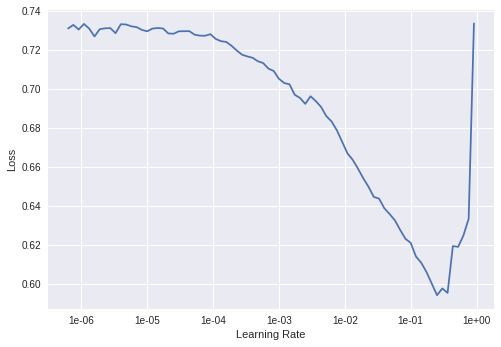

In [498]:
learn.lr_find()
learn.recorder.plot()

In [499]:
lr = 3e-2
learn.fit(5, lr)

epoch,train_loss,valid_loss,accuracy,error_rate,time
1,0.551318,0.457768,0.775281,0.224719,00:00
2,0.514421,0.325623,0.865169,0.134831,00:00
3,0.475582,0.363721,0.865169,0.134831,00:00
4,0.448674,0.289443,0.910112,0.089888,00:00
5,0.438200,0.300558,0.865169,0.134831,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


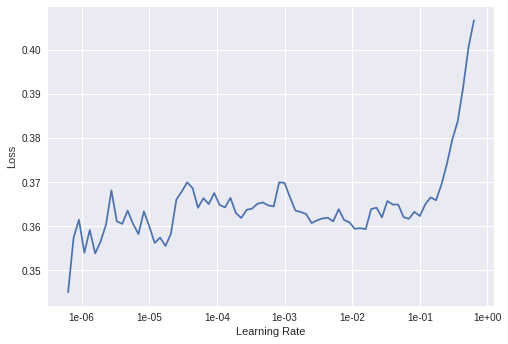

In [503]:
learn.lr_find()
learn.recorder.plot()

In [501]:
learn.fit_one_cycle(5, 2e-4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
1,0.385347,0.309341,0.865169,0.134831,00:00
2,0.376208,0.314424,0.865169,0.134831,00:00
3,0.371969,0.314346,0.865169,0.134831,00:00
4,0.374028,0.314935,0.865169,0.134831,00:00
5,0.371637,0.313169,0.865169,0.134831,00:00


In [504]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-7)

epoch,train_loss,valid_loss,accuracy,error_rate,time
1,0.373735,0.314982,0.865169,0.134831,00:00
2,0.370272,0.315262,0.865169,0.134831,00:00
3,0.369644,0.316851,0.865169,0.134831,00:00
4,0.370419,0.312346,0.865169,0.134831,00:00
5,0.373225,0.309740,0.865169,0.134831,00:00
6,0.372533,0.313007,0.865169,0.134831,00:00
7,0.367147,0.312687,0.865169,0.134831,00:00
8,0.368694,0.313247,0.865169,0.134831,00:00
9,0.370982,0.315994,0.865169,0.134831,00:00
10,0.371719,0.314304,0.865169,0.134831,00:00


## Inference

In [0]:
predictions, *_ = learn.get_preds(DatasetType.Test)
labels = np.argmax(predictions, 1)

In [506]:
labels

tensor([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
        1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [0]:
#create a new dataframe for submission
sub_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': labels})
sub_df.to_csv('submission.csv', index=False)

In [508]:
sub_df.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,1


In [509]:
#take a look at the passenger
test_df.loc[414,:]

PassengerId                 1306
Pclass                         1
Sex                            1
Age                           39
SibSp                          0
Parch                          0
Ticket                  PC 17758
Fare                       108.9
Embarked                       C
AgeGroup                   young
FamilySize                     1
IsAlone                        1
SibCh                      False
FareBin        (31.472, 512.329]
Deck                           3
Title                          5
Name: 414, dtype: object

In [510]:
!kaggle competitions submit -c titanic -f submission.csv -m 'Submission feature engineering'

100% 2.77k/2.77k [00:06<00:00, 471B/s]
Successfully submitted to Titanic: Machine Learning from Disaster